<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

Data augmentation is a technique that increases teh fiversity of your training set by applying random (but realistic) transformations such as image rotation. TF enables a couple of approach to implement data augmentation: `keras preprocessing layers` and `tf.image`.

## Setup

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

f'Tensorflow version: {tf.__version__}'

'Tensorflow version: 2.3.0'

## Download a dataset

This tutorial uses tf_flowers dataset.

In [19]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[:90%]'],
    with_info=True,
    as_supervised=True,
)

print(f'# images train_ds: {tf.data.experimental.cardinality(train_ds)}')
print(f'# images val_ds: {tf.data.experimental.cardinality(val_ds)}')
print(f'# images test_ds: {tf.data.experimental.cardinality(test_ds)}')

# images train_ds: 2936
# images val_ds: 367
# images test_ds: 3303


The flowers dataset has five classes.

In [5]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


Let's retrive an image from the dataset and use it to demostrate data augmentation.

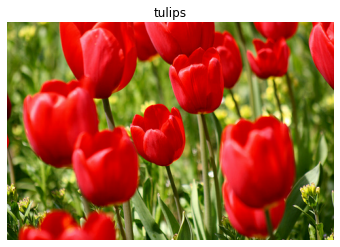

In [14]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image);
_ = plt.title(get_label_name(label));
plt.axis('off');

### User Keras processing layers

#### Resizing and scaling

You can use preprocessing layers to resize your images to a consistent shape, and to rescale pixel values.

In [27]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential(
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE), 
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
)

Note: the rescaling layer above standardize pixel values to `[0, 1]`. If instead you wanted `[-1, 1]`, you would write `Rescaling(1.0/127.5, offset=-1)`.

You can see the result of applying these layers to an image.

In [28]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

ValueError: ignored